# AMR

## Libery import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os
import glob


#colors = ['#001F3F', '#87CEEB', '#00FF00', '#FF0000']
colors = ['navy', 'orange', 'green', 'black', 'gray', 'orange']


## size

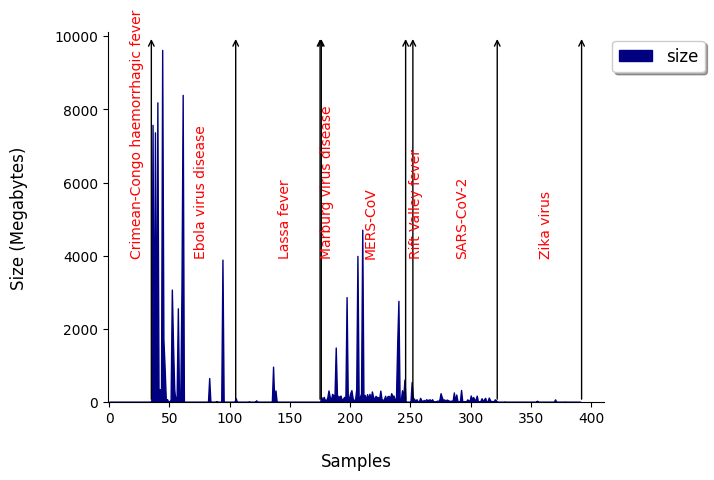

In [112]:
file_size = pd.read_csv('out_res/virus_ill_file_size.txt', sep='\t')

# Define the directory path with a wildcard to match multiple files
input_path = 'out_res/AMR/Virus/ILLUMINA/id_*'

# List files in the directory using glob
name = glob.glob(input_path)
    
# Process each file and count the number of lines
id = []

index = 0
for file_path in name:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Remove empty lines if present
        lines = [line.strip() for line in lines if line.strip()]
        id += lines
    index += len(lines)
    name_pathogens = file_path.split('id_')[1].split('.txt')[0]
    if len(lines) != 0:
        plt.annotate('', xy=(index,10000), xytext=(index,0), arrowprops=dict(arrowstyle='->'),color = 'gray')
        plt.text(int(index-len(lines)/2),4000,name_pathogens,color = 'red',fontsize=10 , rotation='vertical')

#id = list(file_size['ID']) # for metagenomics

def size(file_size_1):
    size = []
    for i in id:
        if (i != '') and (i in list(file_size_1['ID'])):
            size.append(list(file_size_1['size (MB)'])[list(file_size_1['ID']).index(i)])
        elif i != '' :
            size.append(0)
    return size

size = size(file_size)

plt.bar(range(len(size)),size,color = 'navy',label ='size')
plt.xlim(0)
plt.ylim(0)
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fancybox=True, shadow=True,fontsize=12)
plt.xlabel('\nSamples',fontsize=12)
plt.ylabel('Size (Megabytes)\n',fontsize=12)
ax = plt.gca()  # Get the current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.tight_layout()
# Save the plot with higher resolution
plt.savefig('images_new/1_size_virus_ill.png', dpi=600, bbox_inches='tight')
#plt.show()


In [10]:
file_size = pd.read_csv('out_res/bacterial_ont_file_size.txt', sep='\t')
sum(file_size['size (MB)'])

269993.30000000005

## Comparaison of AMR genes 

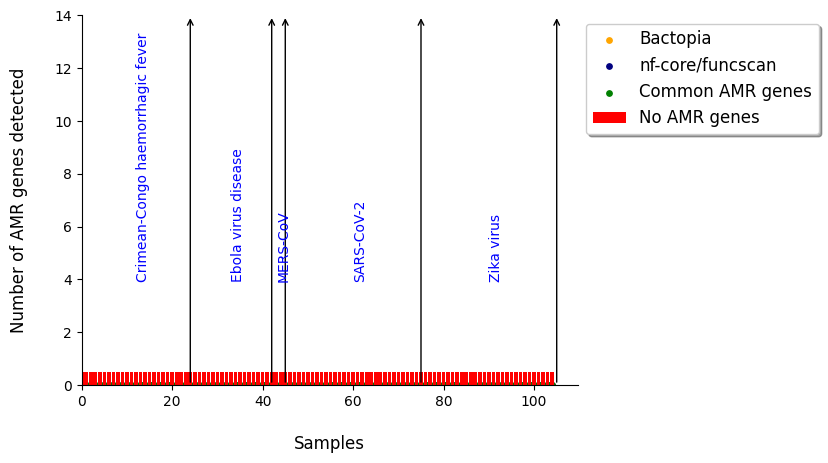

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

def load_genes(file_path):
    try:
        df = pd.read_csv(file_path, sep='\t')
        
        # Filtering based on conditions
        condition = (df['Strand'].str.contains('\+')) & (df['Element type'].str.contains('AMR'))
        genes = df.loc[condition, 'Sequence name'].tolist()
        return  list(set(genes) - {''})
    except FileNotFoundError:
        return []

def calculate_percentage(b_genes, f_genes):
    total_genes = len(b_genes) + len(f_genes)
    if total_genes != 0:
        return 100 - len(f_genes) / total_genes * 100
    else:
        return 0

def main(pathogen, platform):
    # Directory paths
    dir_bactopia = f'out_res/AMR/{pathogen}/{platform}/output_bactopia/'
    dir_nf_funcscan = f'out_res/AMR/{pathogen}/{platform}/output_nf-core_funcscan/'
    
    # Load ID and pathogen names
    # Define the directory path with a wildcard to match multiple files
    input_path = f'out_res/AMR/{pathogen}/{platform}/id_*'
    
    # List files in the directory using glob
    name = glob.glob(input_path)
    
    # Remove the specific file from the list if present
    specific_file = f'out_res/AMR/{pathogen}/{platform}\\id_vir_ill.txt'  # Define the specific file
    if specific_file in name:
        name.remove(specific_file)
    # Process each file and count the number of lines
    id = []
    
    index = 0
    for file_path in name:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # Remove empty lines if present
            lines = [line.strip() for line in lines if line.strip()]
            id += lines
        index += len(lines)
        name_pathogens = file_path.split('id_')[1].split('.txt')[0]
        if '_' in name_pathogens:
            name_pathogens = name_pathogens.replace('_', ' ')
            
        if len(lines) != 0:
            plt.annotate('', xy=(index,14), xytext=(index,0), arrowprops=dict(arrowstyle='->'),color = 'gray')
            plt.text(int(index-len(lines)/2),4,name_pathogens,color = 'blue',fontsize=10 , rotation='vertical')

    # Initialize lists
    bactopia_genes = []
    funcscan_genes = []
    percentages = []
    none = []

    for i in id:
        # Bactopia
        b_genes = load_genes(dir_bactopia+i+'_gene-report.txt')
        
        bactopia_genes.append(b_genes)

        # nf-core/funcscan
        f_genes = load_genes(dir_nf_funcscan+i+'_arg_amrfinderplus.tsv')
        funcscan_genes.append(f_genes)

        # Calculate percentage
        percentages.append(calculate_percentage(b_genes, f_genes))

        # For visualization purposes
        none.append(0 if len(b_genes) + len(f_genes) != 0 else 0.5)

    # Visualization (fill_between or bar or scatter)
    colors = ['navy', 'orange', 'green', 'black', 'gray', 'orange']

    common_genes = [len(set(b_genes) & set(f_genes)) for b_genes, f_genes in zip(bactopia_genes, funcscan_genes)]
    plt.scatter(range(len(bactopia_genes)), [len(genes) for genes in bactopia_genes], color=colors[1], label='Bactopia',s=15)
    plt.scatter(range(len(funcscan_genes)), [len(genes) for genes in funcscan_genes], color=colors[0], label='nf-core/funcscan', s=15)
    plt.scatter(range(len(common_genes)), common_genes, color=colors[2], s=15, label='Common AMR genes')
    plt.bar(range(len(none)), none, color='red', label='No AMR genes')

    #plt.show()
    plt.xlim(0)
    plt.ylim(0 , 14)
    #plt.xticks(fontsize=10)
    #plt.yticks(fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fancybox=True, shadow=True,fontsize=12)
    plt.xlabel('\nSamples',fontsize=12)
    plt.ylabel('Number of AMR genes detected\n',fontsize=12)
    ax = plt.gca()  # Get the current axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Save the plot with higher resolution
    plt.savefig(f'images_new/AMR_{pathogen}_{platform}.png', dpi=600, bbox_inches='tight')

if __name__ == "__main__":
    main('Virus','ONT')


## times

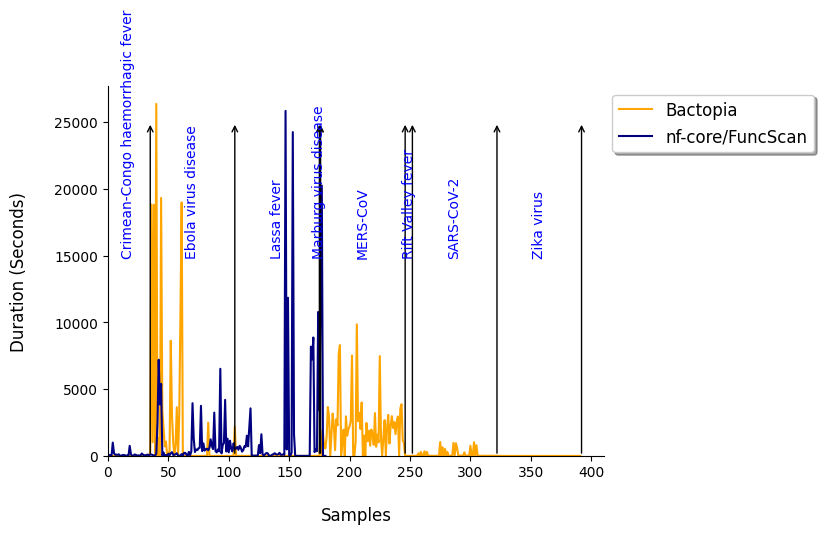

In [42]:

def convert_duration(duration_str):
    """ Converts a duration string to seconds."""
    if not duration_str or duration_str == '' or duration_str == '-' :
        return 0
    
    seconds = 0
    parts = duration_str.split()
    
    for part in parts:
        value, unit = float(part[:-1]), part[-1].lower()
        
        if unit == 'h':
            seconds += value * 60 * 60
        elif unit == 'm':
            seconds += value * 60
        elif unit == 's':
            seconds += value
    
    return seconds


def process_bactopia_trace(file_path, ids):
    """ Processes the bactopia trace file."""
    try:
        bactopia_trace = pd.read_csv(file_path, sep='\t')
        ids_trace = list(bactopia_trace['tag'])
        durations_trace = list(bactopia_trace['duration'])

        durations = []

        for target_id in ids:
            total_duration = 0

            for trace_id, duration_str in zip(ids_trace, durations_trace):
                if target_id == trace_id :
                    total_duration += convert_duration(duration_str)

            durations.append(total_duration)

        return durations
    except FileNotFoundError:
        return []

def process_funcscan_time(file_path, ids , time):
    """ Processes the nf-core/funcscan time file."""
    try:
        funcscan_time = pd.read_csv(file_path, sep='\t')
        #start_times = list(funcscan_time['start'])
        #end_times = list(funcscan_time['end'])
        durations = []

        for id in ids:
            durations.append(list(funcscan_time['time'])[list(funcscan_time['ID']).index(id)])
        #for start_time, end_time in zip(start_times, end_times):
        #    start_time_dt = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S.%f')
         #   end_time_dt = datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S.%f')
          #  duration_seconds = (end_time_dt - start_time_dt).total_seconds()
           # durations.append(duration_seconds)

        return durations
    except FileNotFoundError:
        return []

def main(pathogen, platform):
    bactopia_trace_path = f'out_res/AMR/{pathogen}/{platform}/output_bactopia/bactopia/nf-reports/bactopia-trace.txt'
    #funcscan_time_path = f'out_res/AMR/{pathogen}/{platform}/output_nf-core_funcscan/time.txt'
    funcscan_time_path = f'out_res/AMR/{pathogen}/{platform}/output_nf-core_funcscan/time.txt'

    # Load ID and pathogen names
    # Define the directory path with a wildcard to match multiple files
    input_path = f'out_res/AMR/{pathogen}/{platform}/id_*'
    
    # List files in the directory using glob
    name = glob.glob(input_path)
    
    # Remove the specific file from the list if present
    specific_file = f'out_res/AMR/{pathogen}/{platform}\\id_vir_ill.txt'  # Define the specific file
    if specific_file in name:
        name.remove(specific_file)
    # Process each file and count the number of lines
    id = []
    
    index = 0
    for file_path in name:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            # Remove empty lines if present
            lines = [line.strip() for line in lines if line.strip()]
            id += lines
        index += len(lines)
        name_pathogens = file_path.split('id_')[1].split('.txt')[0]
        if '_' in name_pathogens:
            name_pathogens = name_pathogens.replace('_', ' ')
 
        if len(lines) != 0:
            plt.annotate('', xy=(index,25000), xytext=(index,0), arrowprops=dict(arrowstyle='->'),color = 'gray')
            plt.text(int(index-len(lines)/2-6),15000,name_pathogens,color = 'blue',fontsize=10 , rotation='vertical')

    bactopia_durations = process_bactopia_trace(bactopia_trace_path, id)
    funcscan_durations = process_funcscan_time(funcscan_time_path, id , bactopia_durations)
    
    # Plotting
    plt.plot(bactopia_durations, label='Bactopia', color = colors[1])
    plt.plot(funcscan_durations, label='nf-core/FuncScan', color = colors[0])

    plt.xlim(0)
    plt.ylim(0 )
    #plt.xticks(fontsize=10)
    #plt.yticks(fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fancybox=True, shadow=True,fontsize=12)
    plt.xlabel('\nSamples',fontsize=12)
    plt.ylabel('Duration (Seconds)\n',fontsize=12)
    ax = plt.gca()  # Get the current axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Save the plot with a higher resolution
    plt.savefig(f'images_new/AMR_time_{pathogen}_{platform}.png', dpi=600, bbox_inches='tight')

if __name__ == "__main__":
    main('Virus', 'ILLUMINA')


# Metagenomics

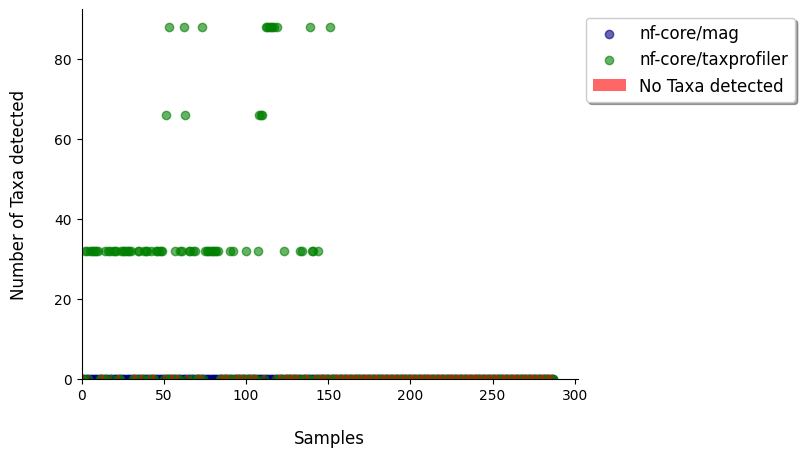

In [57]:

def main(platform):
    dir_ampliseq = f'out_res/metagenomics/{platform}/output_nf-core_ampliseq/'
    dir_mag =f'out_res/metagenomics/{platform}/output_nf-core_mag/'
    dir_taxprofiler = f'out_res/metagenomics/{platform}/output_nf-core_taxprofiler/'
    
    id = f'out_res/metagenomics/{platform}/ID_{platform.lower()}_metagenomic.txt'
    id = open(id, 'r').read().split('\n')

    ampliseq = {}
    mag = {}
    taxprofiler ={}
    
    none = [] # if none

    for index, i in enumerate(id):
        # amliseq
        try:
                name = list(pd.read_csv(dir_ampliseq+i+'_taxonomy.tsv',sep='\t')['Taxon'])
                ampliseq[i] = list(set(name) - {''})
        except:
            ampliseq[i] = [] 
        
        #mag
        try:
                name = list(pd.read_csv(dir_mag+i+'_kraken2_report.txt',sep='\t' , header=3)['taxid'])
                mag[i] = list(set(name) - {''})
        except:
            mag[i] = [] 
    
        #taxprofiler
        try:
                name1 = list(pd.read_csv(dir_taxprofiler+i+'_kraken2_db1_combined_reports.txt',sep='\t' , header=3)['taxid'])
                name2 = list(pd.read_csv(dir_taxprofiler+i+'_kraken2_db2_combined_reports.txt',sep='\t' , header=3)['taxid'])
                taxprofiler[i] = list(set(name1) - {''}) + list(set(name2) - {''})
        except:
            taxprofiler[i] = [] 
        
        # calcule of sum
        sum = len(ampliseq[i]) + len(mag[i]) + len(taxprofiler[i])
        if sum != 0 :
                none.append(0)
        else : 
            none.append(1)
    ampliseq_key = list(ampliseq.keys())
    ampliseq_values = [len(ampliseq[key]) for key in ampliseq_key]
    
    mag_key = list(mag.keys())
    mag_values = [len(mag[key]) for key in mag_key]
    
    taxprofiler_key = list(taxprofiler.keys())
    taxprofiler_values = [len(taxprofiler[key]) for key in taxprofiler_key]
    # Plotting
    plt.scatter(range(len(id)),mag_values,color = colors[0],label ='nf-core/mag',alpha=0.6)
    #plt.scatter(range(len(id)),ampliseq_values,color = colors[1],label ='nf-core/ampliseq',alpha=0.6)
    plt.scatter(range(len(id)),taxprofiler_values,color = colors[2],label ='nf-core/taxprofiler',alpha=0.6)
    plt.bar(range(len(none)),none,color = 'red',label ='No Taxa detected',alpha=0.6)

    plt.xlim(0)
    plt.ylim(0 )
    #plt.xticks(fontsize=10)
    #plt.yticks(fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fancybox=True, shadow=True,fontsize=12)
    plt.xlabel('\nSamples',fontsize=12)
    plt.ylabel('Number of Taxa detected\n',fontsize=12)
    ax = plt.gca()  # Get the current axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Save the plot with a higher resolution
    plt.savefig(f'images_new/metagenomics_{platform}.png', dpi=600, bbox_inches='tight')


if __name__ == "__main__":
    main('ONT')


## time 

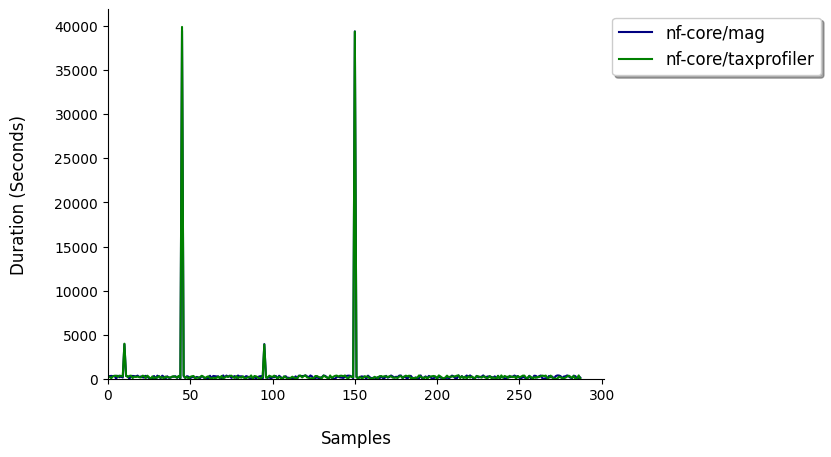

In [71]:

def read_time(file_path, platform):
    """ Reads time information from a file."""
    try:
        if platform == 'ONT' or 'output_nf-core_mag' in file_path:
            return list(pd.read_csv(file_path+'/time.txt', sep='\t', header=None)[1])
        else: 
            df = pd.read_csv(file_path+'/time.txt', sep='\t')
            start_times = list(df['start'])
            end_times = list(df['end'])
            durations = []

            for start_time, end_time in zip(start_times, end_times):
                start_time_dt = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S.%f')
                end_time_dt = datetime.strptime(end_time, '%Y-%m-%d %H:%M:%S.%f')
                duration_seconds = (end_time_dt - start_time_dt).total_seconds()
                durations.append(duration_seconds)

            return durations
    except FileNotFoundError:
        return []

def main(platform):
    dir_ampliseq = f'out_res/metagenomics/{platform}/output_nf-core_ampliseq/'
    dir_mag = f'out_res/metagenomics/{platform}/output_nf-core_mag/'
    dir_taxprofiler = f'out_res/metagenomics/{platform}/output_nf-core_taxprofiler/'

    # Read time information
    amp_time = read_time(dir_ampliseq, platform)
    mag_time = read_time(dir_mag, platform)
    tax_time = read_time(dir_taxprofiler, platform)

    # Plotting
    plt.plot(mag_time, label='nf-core/mag' , color = colors[0])
    plt.plot(amp_time, label='nf-core/ampliseq'  , color = colors[1])
    plt.plot(tax_time, label='nf-core/taxprofiler', color = colors[2])

    # Customize plot
    plt.xlim(0)
    plt.ylim(0 )
    #plt.xticks(fontsize=10)
    #plt.yticks(fontsize=10)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fancybox=True, shadow=True,fontsize=12)
    plt.xlabel('\nSamples',fontsize=12)
    plt.ylabel('Duration (Seconds)\n',fontsize=12)
    ax = plt.gca()  # Get the current axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Save the plot with a higher resolution
    plt.savefig(f'images_new/metagenomic_time_{platform}.png', dpi=600, bbox_inches='tight')

if __name__ == "__main__":
    platform = ['Illumina']
    for i in platform: 
        main(i)


# Genome Annotation


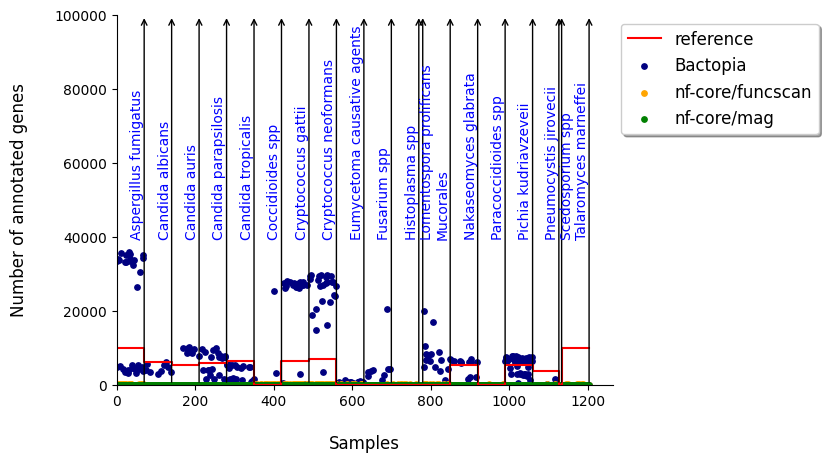

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import os



#input_path = 'out_res/AMR/Virus/ONT/id_*'
input_path ='out_res/annotation_res/ILLUMINA/fungi_id_ill/id_*'
bactopia = 'out_res/annotation_res/ILLUMINA/output_fungi_bactopia/'
mag = 'out_res/annotation_res/ILLUMINA/output_fungi_mag/'
fun = 'out_res/annotation_res/ILLUMINA/output_fungi_funcscan/'
reference= 'out_res/annotation_fungi.txt'
save = 'annotation_fungi_ill.png'


fig, ax = plt.subplots()


    
# List files in the directory using glob - reference
name = glob.glob(input_path)
reference = pd.read_csv(reference,sep='\t', header = None)

# Process each file and count the number of lines
id = []

index = 0
reference_x_values= []
reference_y_values= []

for file_path in name:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Remove empty lines if present
        lines = [line.strip() for line in lines if line.strip()]
        id += lines
    index += len(lines)
    name_pathogens = file_path.split('id_')
    name_pathogens = name_pathogens[len(name_pathogens)-1].split('.txt')[0]
    if '_' in name_pathogens:
        name_pathogens = name_pathogens.replace('_', ' ')
    ref_val = 0
    for ref , val in zip(list(reference[0]) , list(reference[1])):
        if name_pathogens in ref:
            reference_y_values.append(val)
            reference_y_values.append(val)
            reference_x_values.append(index - len(lines))
            reference_x_values.append(index)
    if len(lines) != 0:
        plt.annotate('', xy=(index,100000), xytext=(index,0), arrowprops=dict(arrowstyle='->'),color = 'gray')
        plt.text(int(index-len(lines)/2-1),40000,name_pathogens,color = 'blue',fontsize=10 , rotation='vertical')
        
plt.plot(reference_x_values , reference_y_values , color = 'red' , label = 'reference')

# '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''' annotation


b = []
m = []
f = []
p = 0

for j in id:
    if j != '':
        #--- bactopia
        try :
            df = list(pd.read_csv(bactopia+j+'_annotation.tsv' , sep= '\t').ftype)
            e = 0 
            for g in df:
                if 'gene' in g:
                    e += 1
            b.append(e)
        except Exception as ex:
            b.append(0)
        
        #---- mag
        try :
            df = pd.read_csv(mag+j+'_MEGAHIT-MetaBAT2-.1.tsv' , sep= '\t').ftype
            m.append(len(list(df)))
        except Exception as ex:
            m.append(0)
        
        #----- funcscan
        try :
            df = open(fun+j+'_annotation.gbk', 'r').read().split('\n')
            e = 0 
            for g in df:
                if 'CDS' in g:
                    e += 1
            f.append(e)
        except Exception as ex:
            f.append(0)


plt.scatter(range(len(id)),b,color = colors[0],s =15, label ='Bactopia')
plt.scatter(range(len(id)),f,color = colors[1],s =15, label ='nf-core/funcscan')
plt.scatter(range(len(id)),m,color = colors[2],s =15,label ='nf-core/mag')




plt.xlim(0)
plt.ylim(0,100000 )
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fancybox=True, shadow=True,fontsize=12)
plt.xlabel('\nSamples',fontsize=12)
plt.ylabel('Number of annotated genes\n',fontsize=12)
ax = plt.gca()  # Get the current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig('images_new/'+save,dpi=600, bbox_inches='tight')
plt.show()


